# Exploratory Data Analysis - Terrorism 
# by Kongkan Bora
## Under The Sparks Foundation
### GRIPFEB21
## Project overview
Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’.As a security/defense analyst, try to find out the hot zone of terrorism.What all security issues and insights you can derive by EDA?


In [113]:
# Importing all libraries required 
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import folium
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings('ignore')

In [114]:
#import data
#url="https://bit.ly/2TK5Xn5"
df= pd.read_csv("globalterrorism.csv",encoding='latin1')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [115]:
df.columns


Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [116]:
df.rename(columns={'eventid':'Event_id','iyear':'Year','imonth':'Month','iday':'Day','approxdate':'Approx_Date','extended':'Extended','resolution':'Resolution','country':'Country_code','country_txt':'Country','region':'Region_code','region_txt':'Region','provstate':'State','attacktype1_txt':'Attack_Type','target1':'Target','gname':'Group','targtype1_txt':'Target_Type','weaptype1_txt':'Weapon_type','nwound':'Wounded','nkill':'Killed'},inplace=True)

In [117]:
#take some important columns
df=df[['Year','Month','Day','Country','State','Region','city','latitude','longitude','Attack_Type','Wounded','Killed','Target','summary','Group','Target_Type','Weapon_type','success','suicide','motive']]

In [118]:
df.head()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,Attack_Type,Wounded,Killed,Target,summary,Group,Target_Type,Weapon_type,success,suicide,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,0.0,1.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,1,0,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,1,0,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,0.0,1.0,Employee,NaN,Unknown,Journalists & Media,Unknown,1,0,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,1,0,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,1,0,NaN


In [119]:
df.tail()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,Attack_Type,Wounded,Killed,Target,summary,Group,Target_Type,Weapon_type,success,suicide,motive
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,2.0,1.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,1,0,NaN
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,7.0,2.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,1,0,NaN
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,1,0,NaN
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,0,0,NaN
181690,2017,12,31,Philippines,Maguindanao,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,0.0,0.0,Unknown,12/31/2017: An explosive device was discovered...,Unknown,Unknown,Explosives,0,0,NaN


In [120]:
#number of rows and columns
print("Number of rows:")
print(len(df))
print("Number of Columns:")
print(len(df.columns))
print("Dimension:","(",df.shape[0],",",df.shape[1],")")

Number of rows:
181691
Number of Columns:
20
Dimension: ( 181691 , 20 )


In [121]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   Attack_Type  181691 non-null  object 
 10  Wounded      165380 non-null  float64
 11  Killed       171378 non-null  float64
 12  Target       181055 non-null  object 
 13  summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_Type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  success      181691 non-null  int64  
 18  suicide      181691 non-

In [122]:
#checking missing value in dataset
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
city              434
latitude         4556
longitude        4557
Attack_Type         0
Wounded         16311
Killed          10313
Target            636
summary         66129
Group               0
Target_Type         0
Weapon_type         0
success             0
suicide             0
motive         131130
dtype: int64

In [123]:
df.describe()

,Year,Month,Day,latitude,longitude,Wounded,Killed,success,suicide
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,165380.000000,171378.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,3.167668,2.403272,0.889598,0.036507
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,35.949392,11.545741,0.313391,0.187549
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,1.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,1.000000,0.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,8191.000000,1570.000000,1.000000,1.000000


In [124]:
#pairwise correlation of all columns in the dataframe.
df.corr()

,Year,Month,Day,latitude,longitude,Wounded,Killed,success,suicide
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015273,0.015341,-0.082963,0.137736
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.002938,0.003463,-0.002845,0.003071
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.001268,-0.003693,-0.011802,0.003593
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,0.015988,-0.018124,-0.073715,0.068682
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,0.000223,-0.000562,-0.000858,0.000486
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,1.000000,0.534375,0.025804,0.099525
Killed,0.015341,0.003463,-0.003693,-0.018124,-0.000562,0.534375,1.000000,0.053115,0.136086
success,-0.082963,-0.002845,-0.011802,-0.073715,-0.000858,0.025804,0.053115,1.000000,-0.031155
suicide,0.137736,0.003071,0.003593,0.068682,0.000486,0.099525,0.136086,-0.031155,1.000000


In [125]:
#data Analysis
print("The most Attacks Country:",df['Country'].value_counts().idxmax())
print("The most Attacks city:",df['city'].value_counts().index[1])
print("The most Attacks region:",df['Region'].value_counts().idxmax())
print("The most Attacks year:",df['Year'].value_counts().idxmax())
print("The most Attacks month:",df['Month'].value_counts().idxmax())
print("The most Attacks day:",df['Day'].value_counts().idxmax())
print("The most Attacks Group:",df['Group'].value_counts().index[1])
print("Attacks Types:",df['Attack_Type'].value_counts().idxmax())

The most Attacks Country: Iraq
The most Attacks city: Baghdad
The most Attacks region: Middle East & North Africa
The most Attacks year: 2014
The most Attacks month: 5
The most Attacks day: 15
The most Attacks Group: Taliban
Attacks Types: Bombing/Explosion


In [126]:
#year wise count
df['Year'].value_counts(dropna=True).sort_index()


1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

# Data Visualization
## 1.Number of Terrorist Activities Each Year

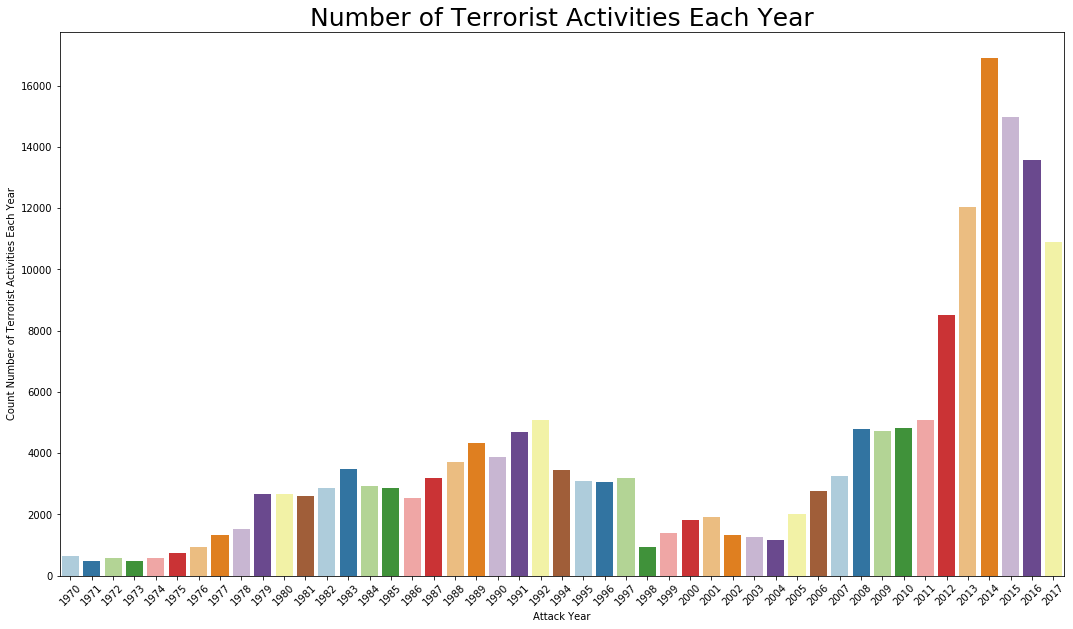

In [127]:
#terrorist Attack
x_year=df['Year'].unique()
y_counts_attack=df['Year'].value_counts(dropna=True).sort_index()
plt.figure(figsize=(18,10))
sns.barplot(x=x_year,y=y_counts_attack,palette='Paired')
plt.xticks(rotation=45)
plt.xlabel("Attack Year")
plt.ylabel("Count Number of Terrorist Activities Each Year")
plt.title("Number of Terrorist Activities Each Year",fontsize=25)
plt.show()

## The Percentage attacks have increased

In [128]:
year=df.Year.value_counts().to_dict()
rate=((year[2017]-year[1970])/year[2017])*100
print("number of attacks from 1970 have increased by:",np.round(rate,0),"% till 2017")

number of attacks from 1970 have increased by: 94.0 % till 2017


# 2.Number of Terrorist Activities by Region in Each Year

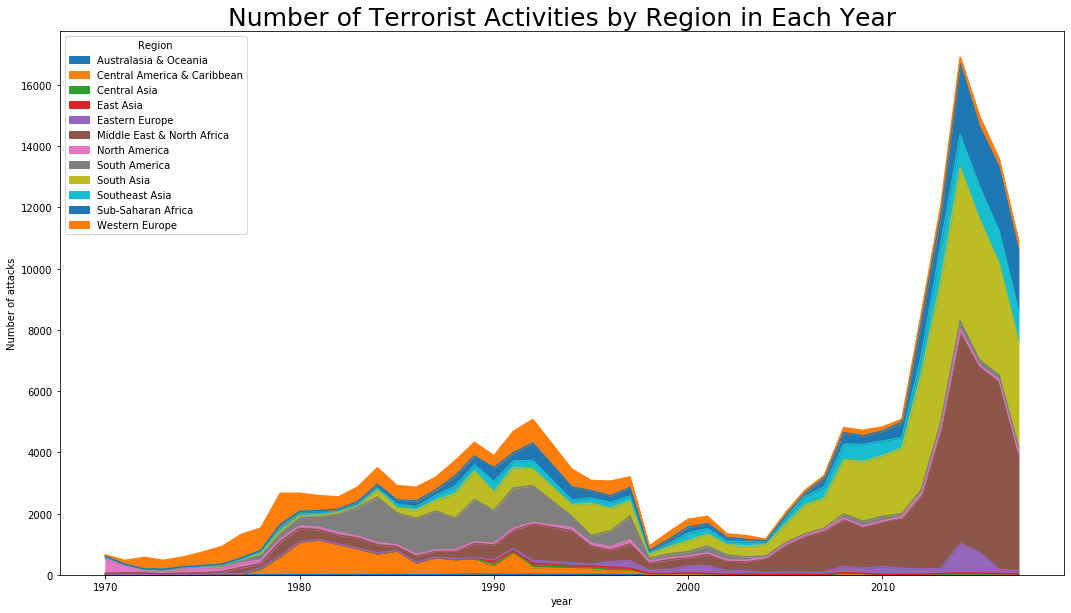

In [69]:
pd.crosstab(df.Year,df.Region).plot(kind='area',figsize=(18,10))
plt.title("Number of Terrorist Activities by Region in Each Year",fontsize=25)
plt.xlabel('year')
plt.ylabel('Number of attacks')
plt.show()

In [129]:
#add wounded and killed 
df['Wounded']=df['Wounded'].fillna(0).astype(int)
df['Killed']=df['Killed'].fillna(0).astype(int)
df['Casualities']=df['Wounded']+df['Killed']

In [137]:
#top 50 worst terror attacks
df_new=df.sort_values(by='Casualities',ascending=False)[:50]
heat=df_new.pivot_table(index='Country',columns='Year',values='Casualities')
heat.fillna(0,inplace=True)

In [138]:
heat.head()


Year,1982,1984,1987,1992,1994,1995,1996,1997,1998,2001,...,2005,2006,2007,2008,2009,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,450.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0,0.0
Egypt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,438.0
Ethiopia,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
#heat-map
py.init_notebook_mode(connected=True)
heatmap=go.Heatmap(z=heat.values,x=heat.columns,y=heat.index)
data=[heatmap]
layout=go.Layout(title='Top 50 terror Attacks in History from 1982 to 2017',
                xaxis=dict(ticks='',nticks=20),
                yaxis=dict(ticks=''))
fig=go.Figure(data=data,layout=layout)
#py.iplot(fig,filename='heatmap',show_link=False)
fig.show()


In [140]:
df['Country'].value_counts()[:20]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

# 3. Affected countries/Regions

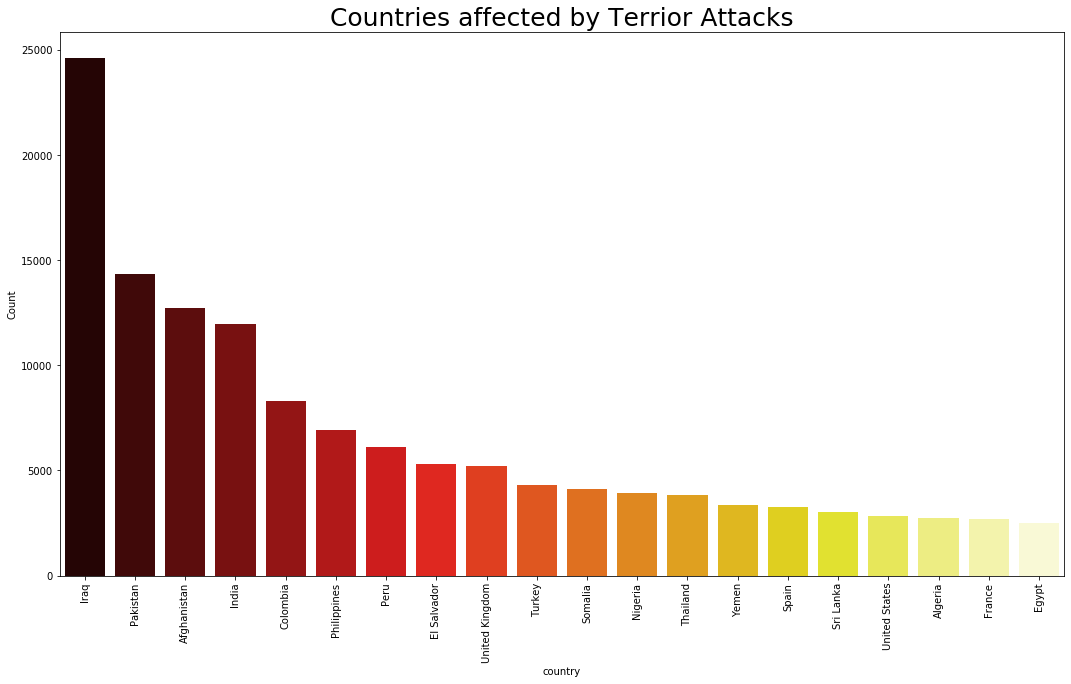

In [141]:
#Affecting countries
plt.subplots(figsize=(18,10))
sns.barplot(df['Country'].value_counts()[:20].index,df['Country'].value_counts()[:20].values,palette='hot')
plt.xticks(rotation=90)
plt.xlabel("country")
plt.ylabel("Count")
plt.title("Countries affected by Terrior Attacks",fontsize=25)
plt.show()

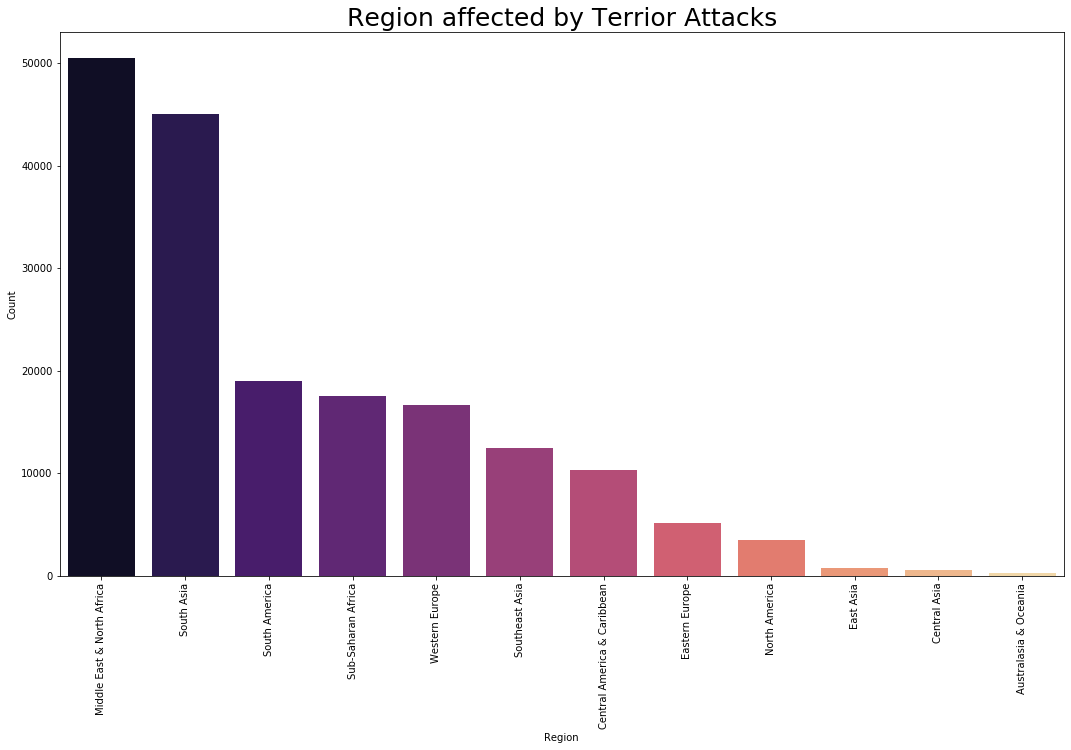

In [142]:
#affected regions
plt.subplots(figsize=(18,10))
sns.barplot(df['Region'].value_counts()[:20].index,df['Region'].value_counts()[:20].values,palette='magma')
plt.xticks(rotation=90)
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Region affected by Terrior Attacks",fontsize=25)
plt.show()

# 4.Number of death in each year

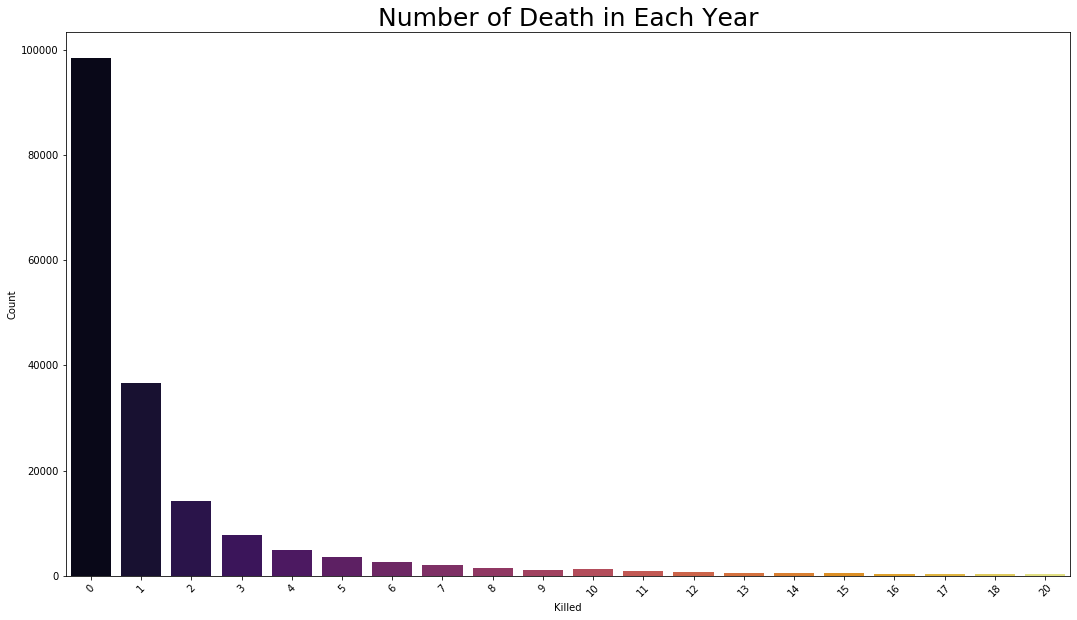

In [143]:
#number of death in each year
plt.subplots(figsize=(18,10))
sns.barplot(df['Killed'].value_counts()[:20].index,df['Killed'].value_counts()[:20].values,palette='inferno')
plt.xticks(rotation=45)
plt.xlabel("Killed")
plt.ylabel("Count")
plt.title("Number of Death in Each Year",fontsize=25)
plt.show()

# 5.Number of Injuries in each Year

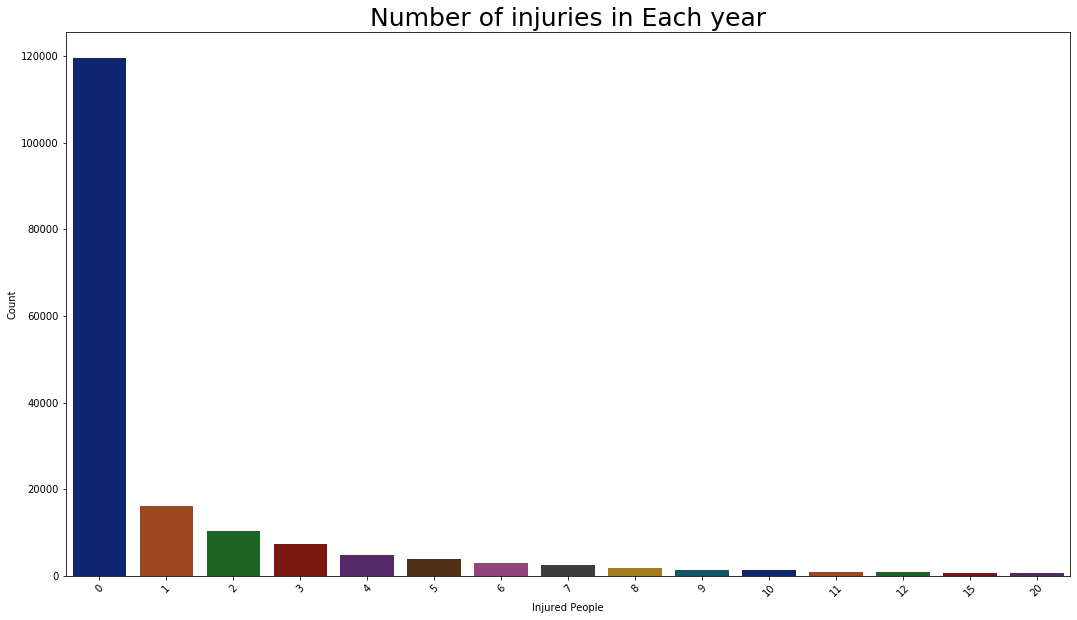

In [144]:
#Number of Injuries in each Year
plt.subplots(figsize=(18,10))
sns.barplot(df['Wounded'].value_counts()[:15].index,df['Wounded'].value_counts()[:15].values,palette='dark')
plt.xticks(rotation=45)
plt.xlabel("Injured People")
plt.ylabel("Count")
plt.title("Number of injuries in Each year",fontsize=25)
plt.show()

# 6.Methods of Attacks

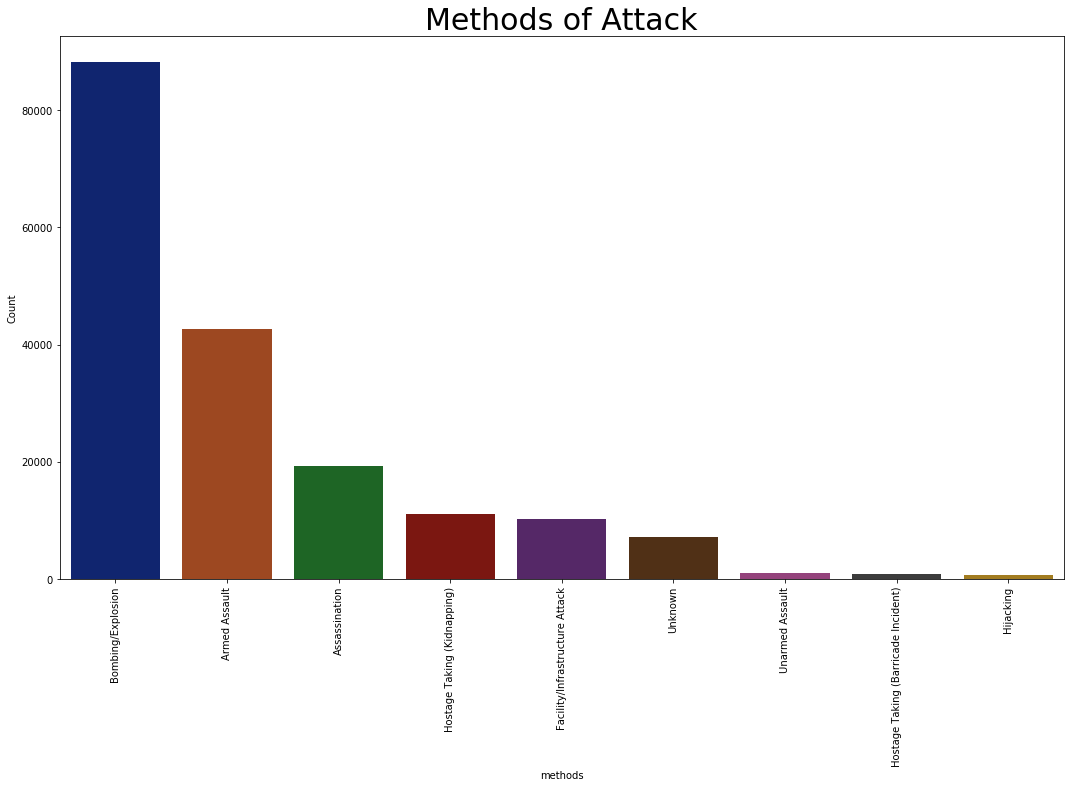

In [145]:
plt.subplots(figsize=(18,10))
sns.barplot(df['Attack_Type'].value_counts().index,df['Attack_Type'].value_counts().values,palette='dark')
plt.xticks(rotation=90)
plt.xlabel("methods")
plt.ylabel("Count")
plt.title("Methods of Attack",fontsize=30)
plt.show()

# 7.Most Active Organisation

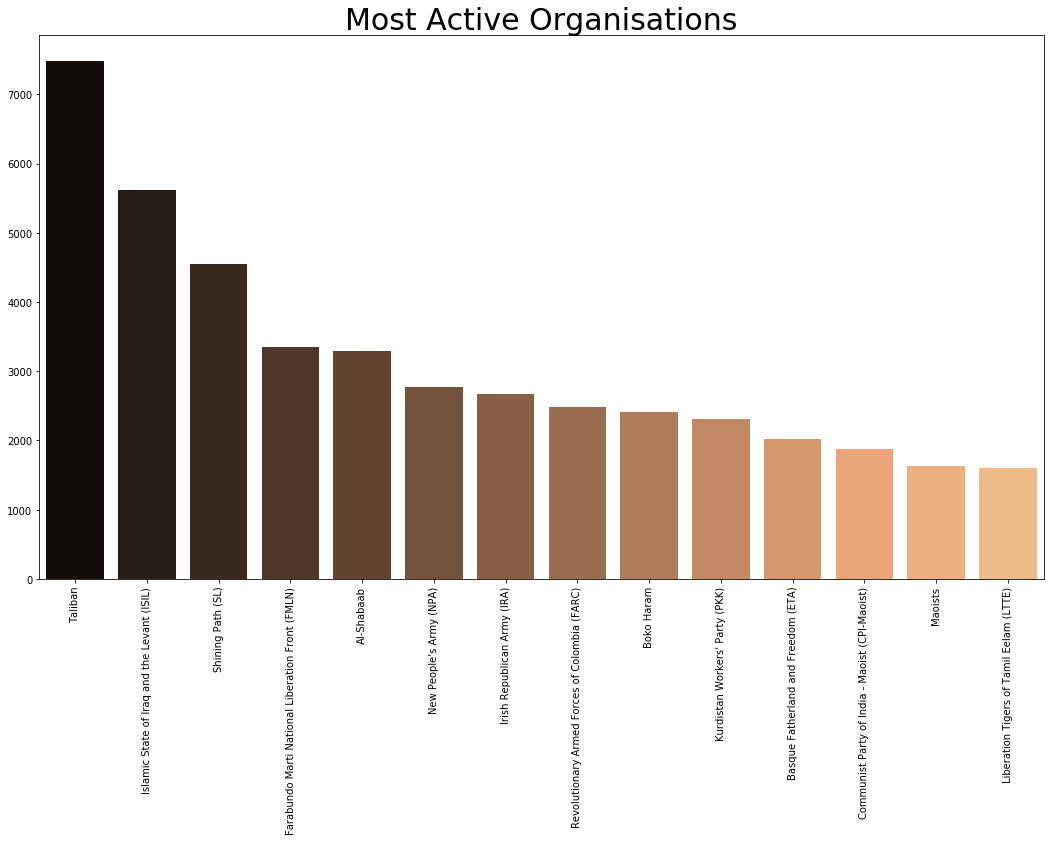

In [146]:
plt.subplots(figsize=(18,10))
sns.barplot(df['Group'].value_counts()[1:15].index,df['Group'].value_counts()[1:15].values,palette='copper')
plt.xticks(rotation=90)
#plt.xlabel("methods")
#plt.ylabel("Count")
plt.title("Most Active Organisations",fontsize=30)
plt.show()

# 8.Most Affected targets

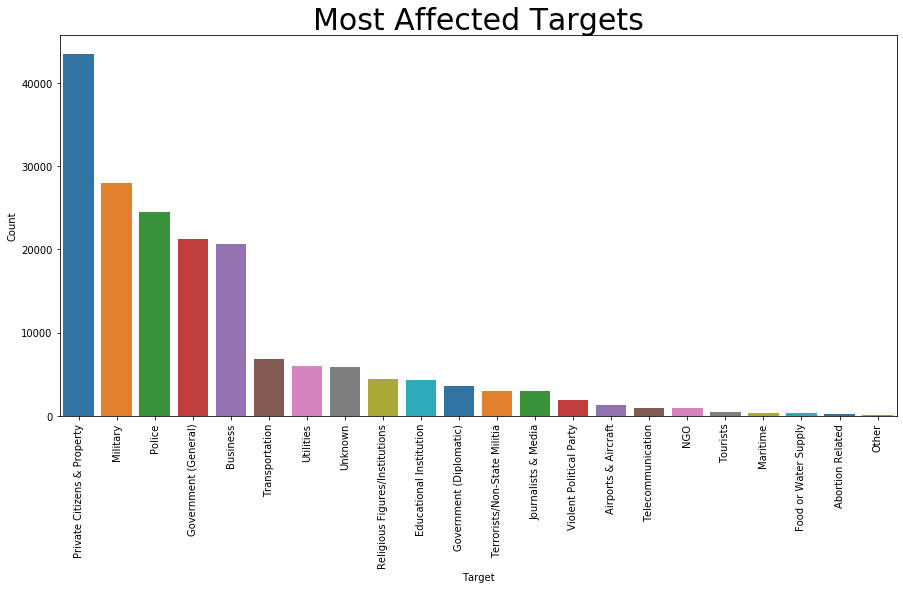

In [147]:
plt.subplots(figsize=(15,7))
sns.barplot(df['Target_Type'].value_counts().index,df['Target_Type'].value_counts().values,palette='tab10')
plt.xticks(rotation=90)
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Most Affected Targets",fontsize=30)
plt.show()

# 9. Attacks Result

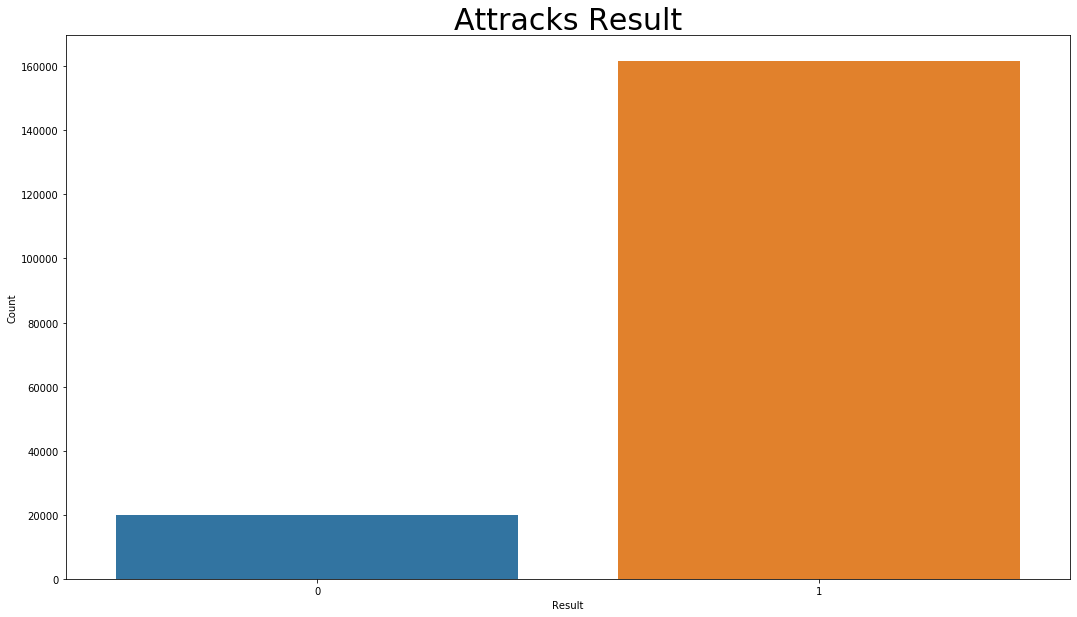

Success: 161632
Failure: 20059


In [148]:
plt.subplots(figsize=(18,10))
sns.barplot(df['success'].value_counts().index,df['success'].value_counts().values,palette='tab10')
plt.xlabel("Result")
plt.ylabel("Count")
plt.title("Attracks Result",fontsize=30)
plt.show()
print("Success:",df['success'].value_counts().values[0])
print("Failure:",df['success'].value_counts().values[1])

# 10.Suicide Attack

In [149]:
ct=pd.crosstab(df.Attack_Type,df.suicide)
ct
#print("Success:",df['success'].value_counts().values[0])
#print("Failure:",df['success'].value_counts().values[1])

suicide,0,1
Attack_Type,,
Armed Assault,42620,49
Assassination,19050,262
Bombing/Explosion,82041,6214
Facility/Infrastructure Attack,10355,1
Hijacking,648,11
Hostage Taking (Barricade Incident),937,54
Hostage Taking (Kidnapping),11120,38
Unarmed Assault,1013,2
Unknown,7274,2


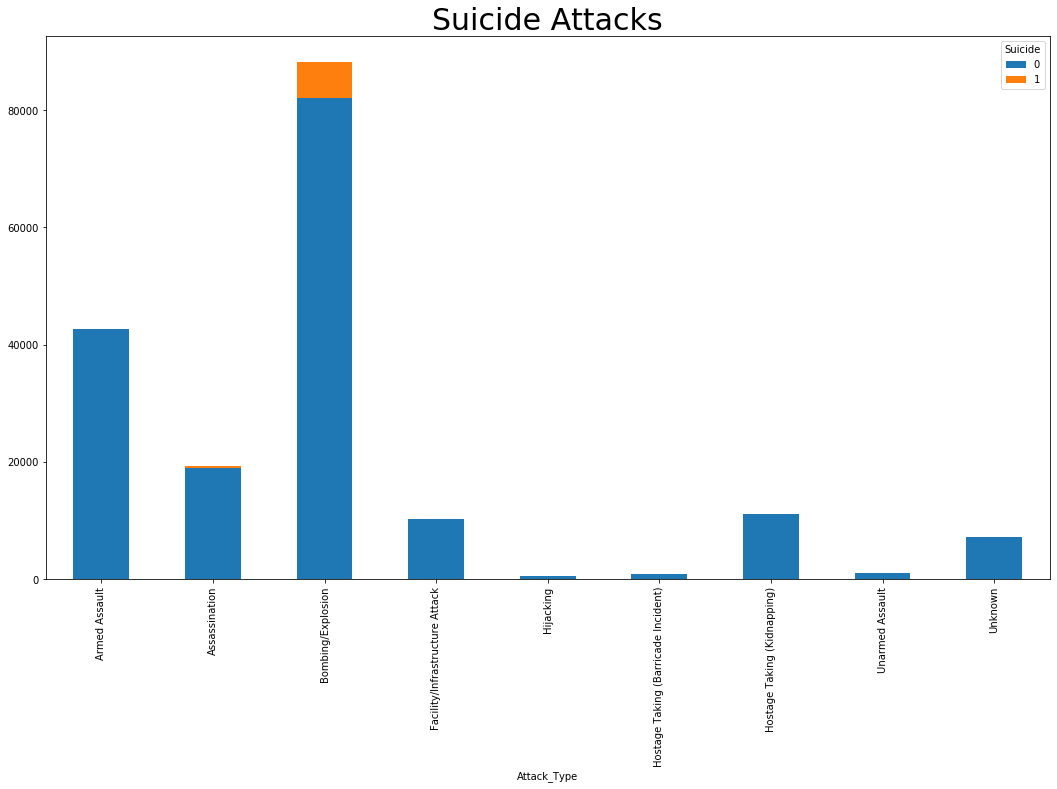

In [150]:
# now stack and reset
ct.plot.bar(stacked=True,figsize=(18,10))
plt.title("Suicide Attacks",fontsize=30)
plt.legend(title='Suicide')
plt.show()

# Data Analysis on Customized data
##  Terrorist Attacks of a particular Year and their Location

In [151]:
filteryear=df['Year']==1970
filterdata=df[filteryear]
filterdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         651 non-null    int64  
 1   Month        651 non-null    int64  
 2   Day          651 non-null    int64  
 3   Country      651 non-null    object 
 4   State        649 non-null    object 
 5   Region       651 non-null    object 
 6   city         651 non-null    object 
 7   latitude     643 non-null    float64
 8   longitude    643 non-null    float64
 9   Attack_Type  651 non-null    object 
 10  Wounded      651 non-null    int32  
 11  Killed       651 non-null    int32  
 12  Target       629 non-null    object 
 13  summary      386 non-null    object 
 14  Group        651 non-null    object 
 15  Target_Type  651 non-null    object 
 16  Weapon_type  651 non-null    object 
 17  success      651 non-null    int64  
 18  suicide      651 non-null    int64  
 19  motive  

In [152]:
Reruireddata=filterdata.loc[:,'city':'longitude']
Reruireddatafilter=Reruireddata.dropna()
Reruireddatalist=Reruireddatafilter.values.tolist()

In [153]:
#map
map=folium.Map(location=[0,30],tiles='Stamen Terrain',zoom_start=2)
markerClustard=folium.plugins.MarkerCluster().add_to(map)
for point in range(0,len(Reruireddatalist)):
    folium.Marker(location=[Reruireddatalist[point][1],Reruireddatalist[point][2]],popup=Reruireddatalist[point][0]).add_to(markerClustard)
map

### Which terrorist group have carried out their operation in each Country.

In [154]:
df.Group.value_counts()[1:15] #as index 0 have "unknown" value

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: Group, dtype: int64

In [155]:
test=df[df.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [156]:
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Syria', 'Iraq', 'Turkey', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

In [157]:
df_group=df.dropna(subset=['latitude','longitude'])

In [158]:
df_group=df_group.drop_duplicates(subset=['Country','Group'])

In [159]:
terro_group=df.Group.value_counts()[1:8].index.tolist()
df_group=df_group.loc[df_group.Group.isin(terro_group)]
df_group.Group.unique()

array(["New People's Army (NPA)", 'Irish Republican Army (IRA)',
       'Shining Path (SL)',
       'Farabundo Marti National Liberation Front (FMLN)', 'Taliban',
       'Al-Shabaab', 'Islamic State of Iraq and the Levant (ISIL)'],
      dtype=object)

In [160]:
map=folium.Map(location=[20,0],tiles='CartoDB positron',zoom_start=2)
markerClustard=folium.plugins.MarkerCluster().add_to(map)
for i in range(0,len(df_group)):
    folium.Marker([df_group.iloc[i]['latitude'],df_group.iloc[i]['longitude']],popup='Group:{}<br>Country:{}'.format(df_group.iloc[i]['Group'],df_group.iloc[i]['Country'])).add_to(markerClustard)
map

In [161]:
# number people killed in terror attack
print("Number of people killed by Terror Attack",int(df['Killed'].sum()))

Number of people killed by Terror Attack 411868


In [162]:
#look what types of attacks these  deaths were made
attack_data=df.loc[:,'Attack_Type']
killed_data=df.loc[:,'Killed']
killType=pd.concat([attack_data,killed_data],axis=1)
killType.head()

,Attack_Type,Killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0


In [163]:
killTypeFormat=killType.pivot_table(columns='Attack_Type',values='Killed',aggfunc=np.sum)
killTypeFormat

Attack_Type,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,160297,24920,157321,3642,3718,4478,24231,880,32381


# Number of Killed in Terrorist Attacks by Country

In [164]:
country_data=df.loc[:,'Country']
country_kill_data=pd.concat([country_data,killed_data],axis=1)
country_kill_data_table=country_kill_data.pivot_table(columns='Country',values='Killed',aggfunc='sum')
country_kill_data_table

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
Killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


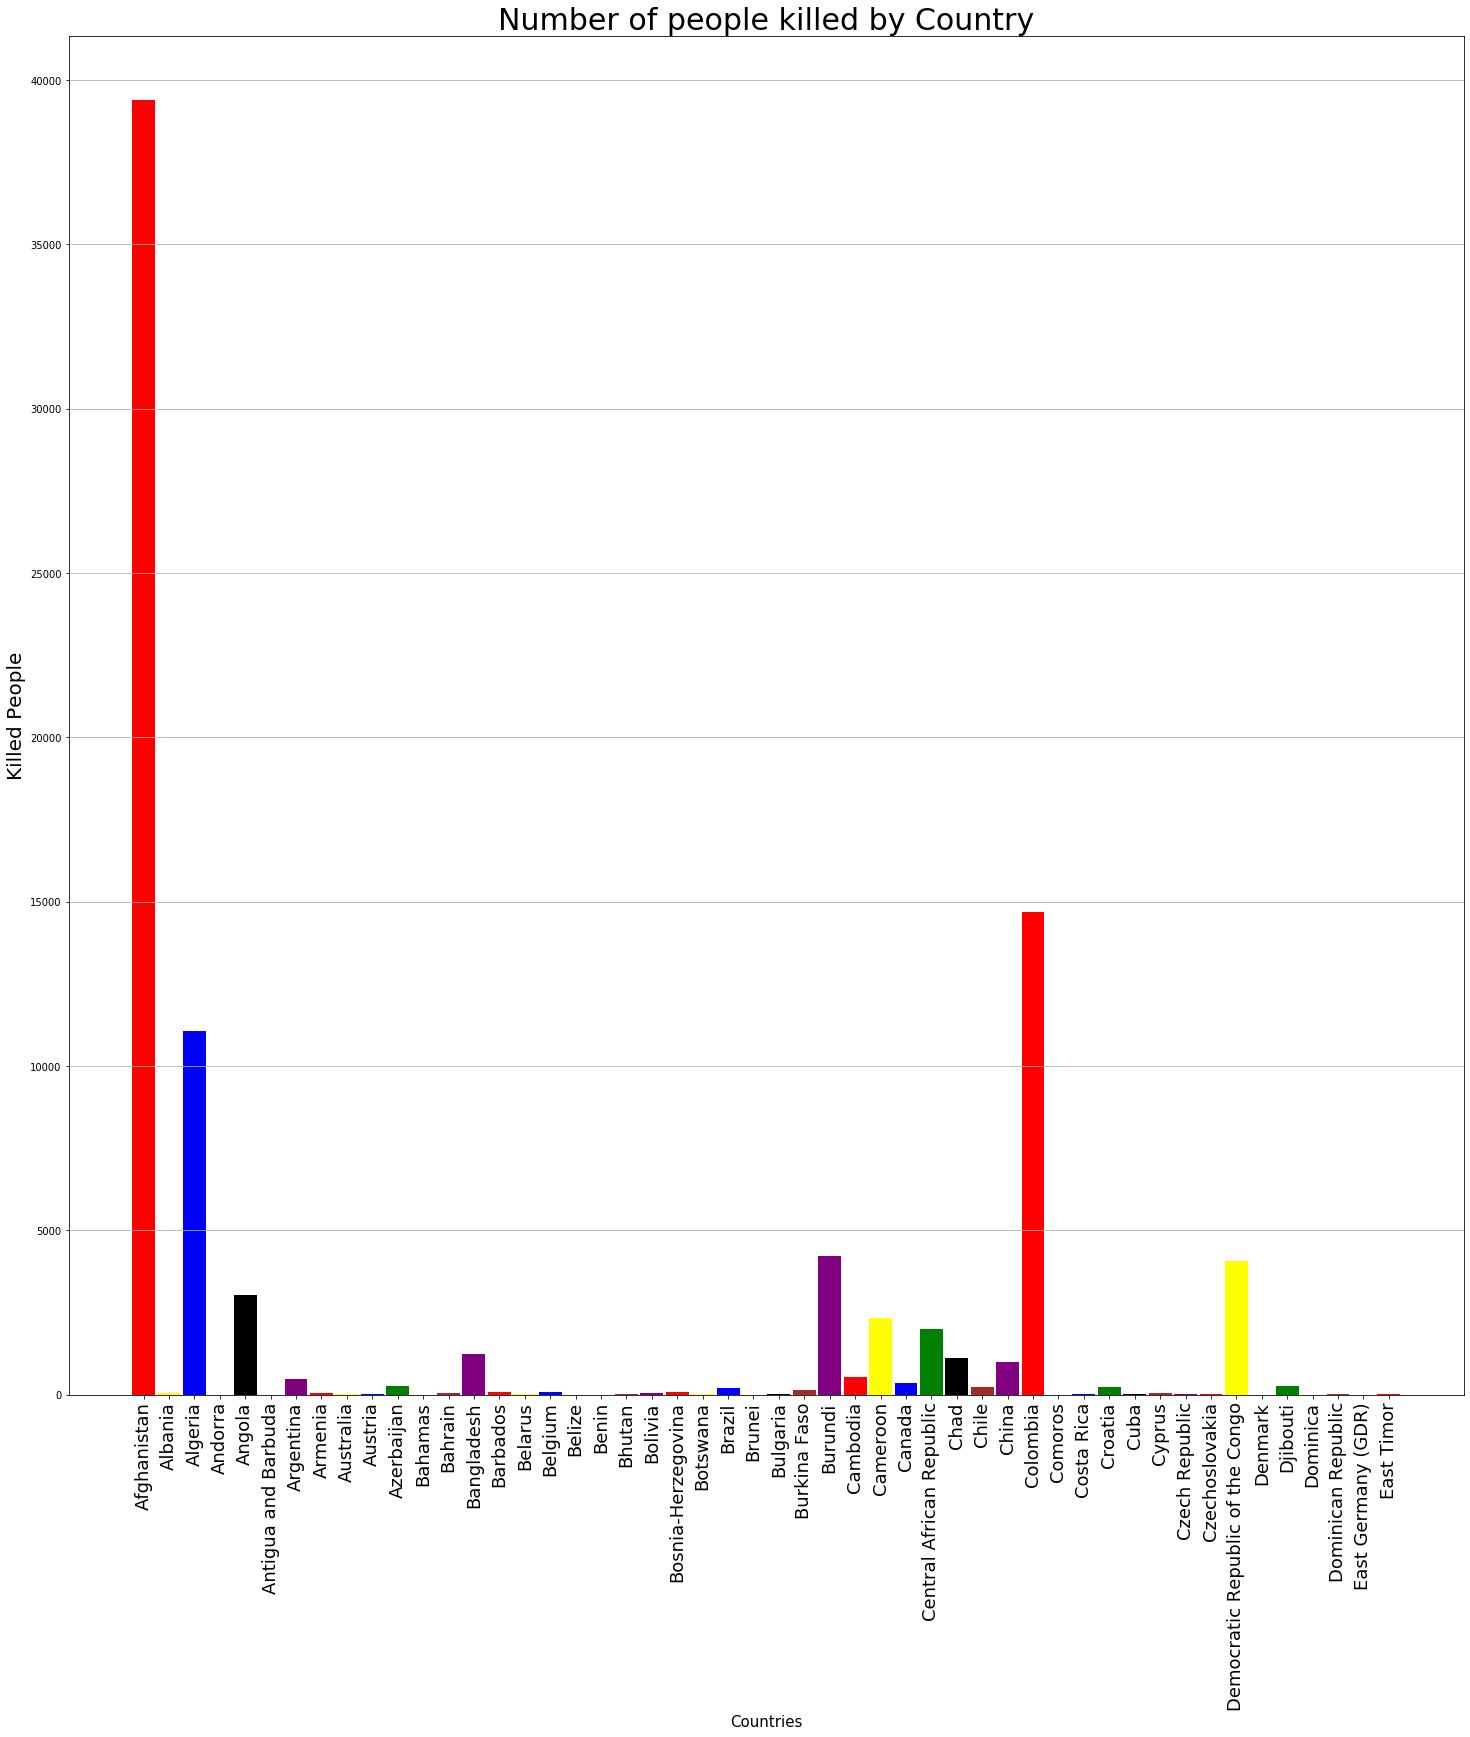

In [165]:
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"]=fig_size
labels=country_kill_data_table.columns.tolist()
labels=labels[:50]
index=np.arange(len(labels))
transpose=country_kill_data_table.T
values=transpose.values.tolist()
values=values[:50]
#convert flot to int
colors=['red','yellow','blue','green','black','brown','purple']
fig,ax=plt.subplots(1,1)
ax.yaxis.grid(True)
values=[int(i[0]) for i in values]
fig_size=plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"]=fig_size
plt.bar(index,values,color=colors,width=.9)
plt.xlabel("Countries",fontsize=15)
plt.ylabel("Killed People",fontsize=20)
plt.xticks(index,labels,fontsize=18,rotation=90)
plt.title("Number of people killed by Country",fontsize=30)
plt.show()

# Before and after the war on Terror


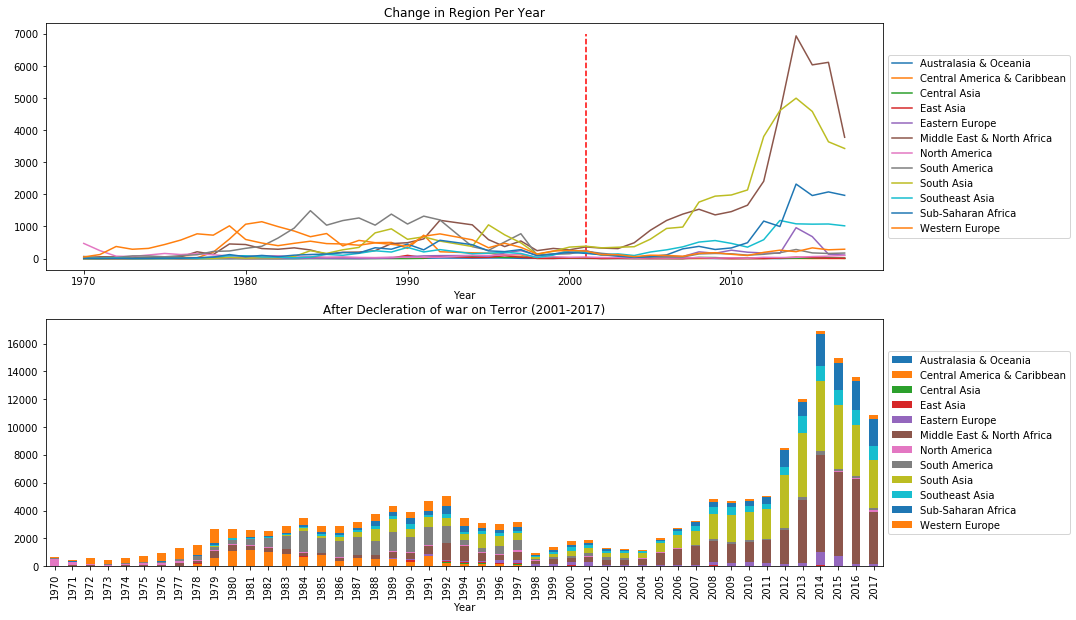

In [166]:
#after 9/11 attacks in new york city, the Us-led war on terror was lunched with the goal to distinguish terrorism primarily
df_after=df[df['Year']>200]
fig,ax=plt.subplots(figsize=(15,10),nrows=2,ncols=1)
ax[0]=pd.crosstab(df.Year,df.Region).plot(ax=ax[0])
ax[0].set_title('Change in Region Per Year')
ax[0].legend(loc='center left',bbox_to_anchor=(1,0.5))
ax[0].vlines(x=2001,ymin=0,ymax=7000,colors='red',linestyles='--')
pd.crosstab(df_after.Year,df_after.Region).plot.bar(stacked=True,ax=ax[1])
ax[1].set_title('After Decleration of war on Terror (2001-2017)')
ax[1].legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.show()

#### From the first plot, it is noticible that the  terrorise landscape before and after the war on terror is vastly different.Before 2001, the regins were much closer together in terms of activity eventually all droping to a minimum in 2000. After 2001,the Midddle East and South Asia have dictated the rise in terrorism numbers,with a significance increase in Sub-Saharan Africa as well.

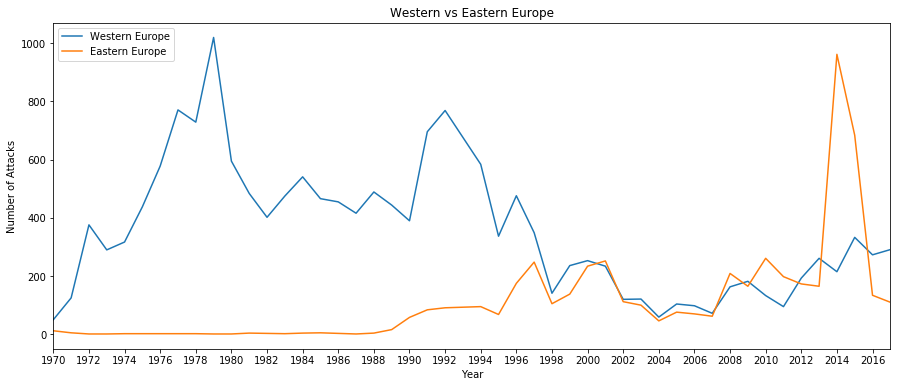

In [167]:
fig,axes=plt.subplots(figsize=(15,6))
sns.lineplot(df[df['Region']=='Western Europe']['Year'].value_counts().index,
            df[df['Region']=='Western Europe']['Year'].value_counts().values)
sns.lineplot(df[df['Region']=='Eastern Europe']['Year'].value_counts().index,
            df[df['Region']=='Eastern Europe']['Year'].value_counts().values)
plt.xlabel('Year')
plt.xticks(np.arange(1970,2017,2))
plt.xlim(1970,2017)
plt.ylabel('Number of Attacks')
plt.title('Western vs Eastern Europe')
axes.legend(labels=['Western Europe','Eastern Europe'])
plt.show()

#### Though Western Europe has seen considerably more terrorism in the past , there is now a shift in activity towards the east 1991 seems to be a turning point here considering the dissolution of the Soviet Union at the time and the numerous accounts of unrest that followed. The spike at 2014 can be attributed to the recent Ukrainian revolution and related Ukrainian - Russian conflicts such as the war in Donbass. The following plots show the number of Russia and Ukraine's terrorist events compared to the rest of Eastern Europe

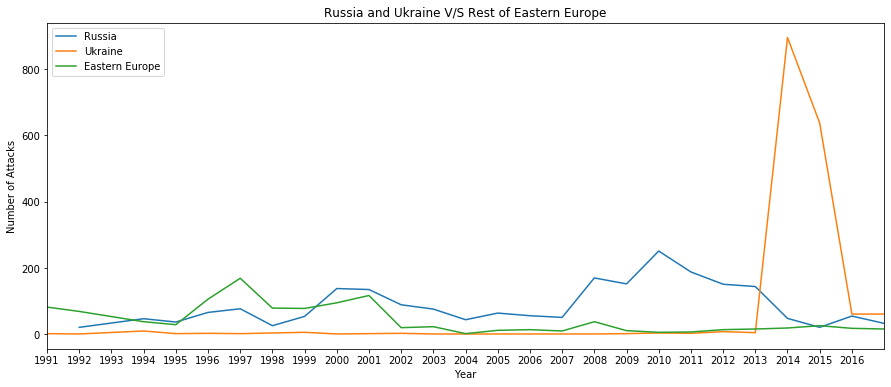

In [168]:
fig,ax=plt.subplots(figsize=(15,6))
russia=df[(df['Country']=='Russia')&(df['Year'].between(1991,2017,inclusive=True))]['Year'].value_counts()
ukrain=df[(df['Country']=='Ukraine')&(df['Year'].between(1991,2017,inclusive=True))]['Year'].value_counts()
rest_east=df[(df['Country']!='Russia')&(df['Country']!='Ukraine')&(df['Region']=='Eastern Europe')&(df['Year'].between(1991,2017,inclusive=True))]['Year'].value_counts()
sns.lineplot(x=russia.index,y=russia.values)
sns.lineplot(x=ukrain.index,y=ukrain.values)
sns.lineplot(x=rest_east.index,y=rest_east.values)
plt.xticks(np.arange(1991,2017,1))
plt.xlim(1991,2017)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Russia and Ukraine V/S Rest of Eastern Europe')
ax.legend(labels=['Russia','Ukraine','Eastern Europe'])

#### Clearly, Russia and Ukraine are the main contributers to this shift. Ukraine's isolated spike in 2014 shown here is nearly identical to the previous plot. A large majority of Eastern European terrorism in the past couple years has been found in Ukraine

# THANK YOU